In [1]:
import pandas as pd
import sys  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns   

In [38]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('/Users/Zeu/Downloads/dacon_electricity_usage_pred/data/train.csv')


df.head()


,num_date_time,건물번호,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20240601 00,1,20240601 00,18.3,0.0,2.6,82.0,0.0,0.0,5794.80
1,1_20240601 01,1,20240601 01,18.3,0.0,2.7,82.0,0.0,0.0,5591.85
2,1_20240601 02,1,20240601 02,18.1,0.0,2.6,80.0,0.0,0.0,5338.17
3,1_20240601 03,1,20240601 03,18.0,0.0,2.6,81.0,0.0,0.0,4554.42
4,1_20240601 04,1,20240601 04,17.8,0.0,1.3,81.0,0.0,0.0,3602.25


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(°C)         204000 non-null  float64
 4   강수량(mm)        204000 non-null  float64
 5   풍속(m/s)        204000 non-null  float64
 6   습도(%)          204000 non-null  float64
 7   일조(hr)         204000 non-null  float64
 8   일사(MJ/m2)      204000 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB


In [16]:
building = pd.read_csv('/Users/Zeu/Downloads/dacon_electricity_usage_pred/data/building_info.csv')



building.head()


,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,호텔,82912.71,77586.00,-,-,-
1,2,상용,40658.90,30392.82,-,-,-
2,3,병원,560431.00,418992.00,278.58,-,-
3,4,호텔,41813.29,23715.71,-,-,-
4,5,학교,403749.39,248507.00,1983.05,1025,250


In [ ]:
# '-' 처리 및 숫자형 변환 + 결측치 채우기
# 0으로 바꾼 이유는 태양광, ESS, PCS 용량이 없는 건물도 있을 수 있기 때문
# 중앙값이나 평균값으로 채우는 방법도 있지만, 이 경우에는 0으로 처리
for col in ['태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)']:
    building[col] = pd.to_numeric(building[col].replace('-', np.nan))
    building[col] = building[col].fillna(0)

# 필요한 열만 추출
static_features = building[['건물번호', '태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)']]

# merge 수행 (왼쪽 기준: df)
merged_df = df.merge(static_features, on='건물번호', how='left')


In [20]:


counts = df['강수량(mm)'].value_counts()
print(counts)

강수량(mm)
0.0     185388
0.1       2449
0.2       1592
0.3       1178
0.4        893
         ...  
31.2         1
48.6         1
29.4         1
37.4         1
26.5         1
Name: count, Length: 283, dtype: int64


In [ ]:
# merge 제대로 되었는지 확인
print(merged_df.columns)
print(merged_df.head())


Index(['num_date_time', '건물번호', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)',
       '일조(hr)', '일사(MJ/m2)', '전력소비량(kWh)', '태양광용량(kW)', 'ESS저장용량(kWh)',
       'PCS용량(kW)'],
      dtype='object')
   num_date_time  건물번호           일시  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)  일조(hr)  \
0  1_20240601 00     1  20240601 00    18.3      0.0      2.6   82.0     0.0   
1  1_20240601 01     1  20240601 01    18.3      0.0      2.7   82.0     0.0   
2  1_20240601 02     1  20240601 02    18.1      0.0      2.6   80.0     0.0   
3  1_20240601 03     1  20240601 03    18.0      0.0      2.6   81.0     0.0   
4  1_20240601 04     1  20240601 04    17.8      0.0      1.3   81.0     0.0   

   일사(MJ/m2)  전력소비량(kWh)  태양광용량(kW)  ESS저장용량(kWh)  PCS용량(kW)  
0        0.0     5794.80        0.0           0.0        0.0  
1        0.0     5591.85        0.0           0.0        0.0  
2        0.0     5338.17        0.0           0.0        0.0  
3        0.0     4554.42        0.0           0.0        0.0  
4        

In [23]:
train = pd.read_csv('/Users/Zeu/Downloads/dacon_electricity_usage_pred/data/train.csv')
test = pd.read_csv('/Users/Zeu/Downloads/dacon_electricity_usage_pred/data/test.csv')

train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(°C)         204000 non-null  float64
 4   강수량(mm)        204000 non-null  float64
 5   풍속(m/s)        204000 non-null  float64
 6   습도(%)          204000 non-null  float64
 7   일조(hr)         204000 non-null  float64
 8   일사(MJ/m2)      204000 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_date_time  16800 non-null  object 
 1   건물번호           16800 non-null  int64  
 2   일시             16800 non-null  object 
 3   기온(°C)         16800 non-null  float64
 4   강수량(mm)        16800 non-null  float64
 5   풍속(m/s)        16800 non-null  float64
 6   습도(%)          16800 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 918.9+ KB


In [29]:
train = train.drop(columns=['일조(hr)', '일사(MJ/m2)'])  # 일조와 일사 열 제거

train['is_train'] = 1
test['is_train'] = 0

combined_df = pd.concat([train, test], ignore_index=True)

combined_df.info()


KeyError: "['일조(hr)', '일사(MJ/m2)'] not found in axis"

In [31]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220800 entries, 0 to 220799
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  220800 non-null  object 
 1   건물번호           220800 non-null  int64  
 2   일시             220800 non-null  object 
 3   기온(°C)         220800 non-null  float64
 4   강수량(mm)        220800 non-null  float64
 5   풍속(m/s)        220800 non-null  float64
 6   습도(%)          220800 non-null  float64
 7   전력소비량(kWh)     204000 non-null  float64
 8   is_train       220800 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.2+ MB


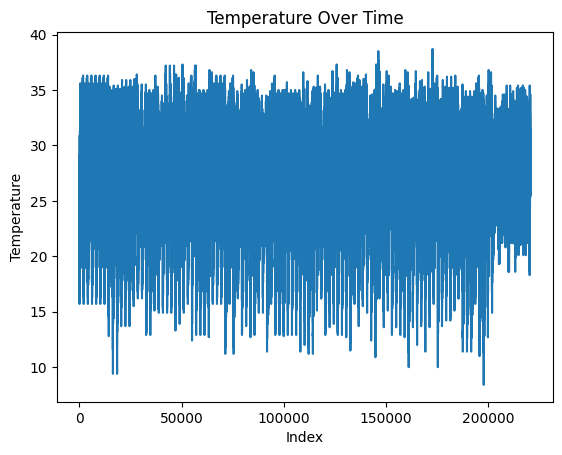

In [34]:
temp = combined_df['기온(°C)'] 

sns.lineplot(x=temp.index, y=temp.values)
plt.title('Temperature Over Time')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.show()


Text(0.5, 1.0, 'Temperature Distribution')

/Users/Zeu/Downloads/dacon_electricity_usage_pred/.venv/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/Zeu/Downloads/dacon_electricity_usage_pred/.venv/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/Zeu/Downloads/dacon_electricity_usage_pred/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Zeu/Downloads/dacon_electricity_usage_pred/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


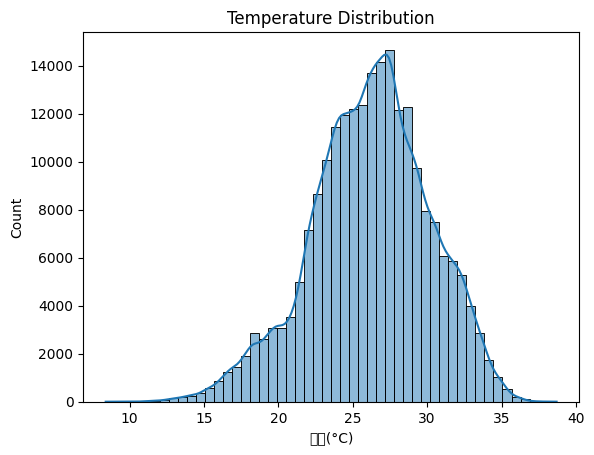

In [35]:
sns.histplot(temp, kde=True, bins=50)
plt.title('Temperature Distribution')

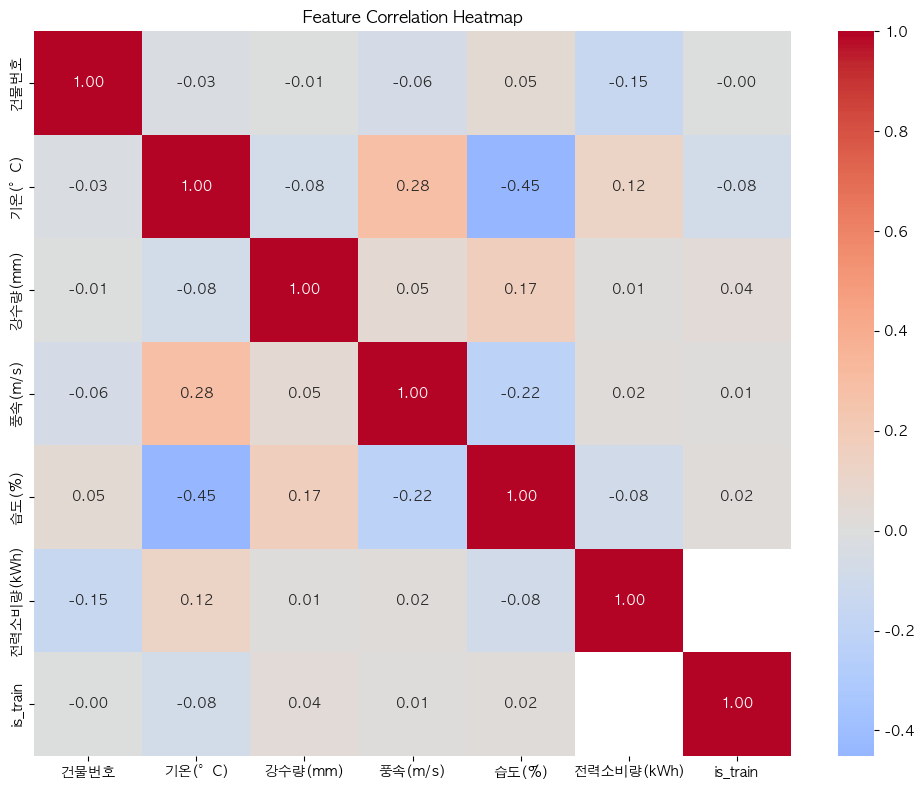

In [39]:

# 수치형 열만 추출 (문자형, 날짜형 제외)
numeric_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns

# 상관계수 행렬
corr = combined_df[numeric_cols].corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [40]:

# 2. '-' 값을 NaN으로, 그 후 0으로 대체
cols_to_convert = ['태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)']
for col in cols_to_convert:
    building[col] = pd.to_numeric(building[col].replace('-', np.nan))
    building[col] = building[col].fillna(0)

# 3. 필요한 열만 merge
merged_df = combined_df.merge(
    building[['건물번호'] + cols_to_convert],
    on='건물번호',
    how='left'
)

In [41]:
print(merged_df[cols_to_convert].describe())  # 값 분포 확인
print(merged_df.isnull().sum())              # NaN 여부 확인


           태양광용량(kW)  ESS저장용량(kWh)      PCS용량(kW)
count  220800.000000  220800.00000  220800.000000
mean      231.792200     116.30800      58.270000
std       419.067099     455.25775     219.863812
min         0.000000       0.00000       0.000000
25%         0.000000       0.00000       0.000000
50%        28.125000       0.00000       0.000000
75%       228.670000       0.00000       0.000000
max      1983.050000    3100.00000    1500.000000
num_date_time        0
건물번호                 0
일시                   0
기온(°C)               0
강수량(mm)              0
풍속(m/s)              0
습도(%)                0
전력소비량(kWh)       16800
is_train             0
태양광용량(kW)            0
ESS저장용량(kWh)         0
PCS용량(kW)            0
dtype: int64


In [44]:
merged_df['일시'] = pd.to_datetime(merged_df['일시'], format='%Y%m%d %H')


In [47]:

# 2. 시간 기반 파생 피처
merged_df['hour'] = merged_df['일시'].dt.hour                   # 시간대 (0~23)
merged_df['dayofweek'] = merged_df['일시'].dt.dayofweek         # 요일 (월=0 ~ 일=6)
merged_df['month'] = merged_df['일시'].dt.month                 # 월 (1~12)
merged_df['is_weekend'] = (merged_df['dayofweek'] >= 5).astype(int)  # 주말 여부

# 3. 계절 정보
def get_season(month):
    if month in [3, 4, 5]: return 1  # 봄
    elif month in [6, 7, 8]: return 2  # 여름
    elif month in [9, 10, 11]: return 3  # 가을
    else: return 4  # 겨울

merged_df['season'] = merged_df['month'].map(get_season)

# 4. 설비 설치 여부 (0/1)
merged_df['has_solar'] = (merged_df['태양광용량(kW)'] > 0).astype(int)
merged_df['has_ess'] = (merged_df['ESS저장용량(kWh)'] > 0).astype(int)
merged_df['has_pcs'] = (merged_df['PCS용량(kW)'] > 0).astype(int)

# 5. 상호작용 피처 (기온 × 설비)
merged_df['기온x태양광'] = merged_df['기온(°C)'] * merged_df['has_solar']
merged_df['기온xESS'] = merged_df['기온(°C)'] * merged_df['has_ess']

# 6. 체감온도 (Simplified version)
merged_df['체감온도'] = merged_df['기온(°C)'] - ((0.55 - 0.0055 * merged_df['습도(%)']) * (merged_df['기온(°C)'] - 14.5))

# 7. 불쾌지수 (Discomfort Index)
merged_df['불쾌지수'] = 0.81 * merged_df['기온(°C)'] + 0.01 * merged_df['습도(%)'] * (0.99 * merged_df['기온(°C)'] - 14.3) + 46.3

# 8. 전력소비량은 train에만 존재하므로 제외 대상
# 9. 최종적으로 사용하지 않을 열 제거 가능

In [48]:
merged_df.info()  # 최종 데이터프레임 정보 확인


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220800 entries, 0 to 220799
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   num_date_time  220800 non-null  object        
 1   건물번호           220800 non-null  int64         
 2   일시             220800 non-null  datetime64[ns]
 3   기온(°C)         220800 non-null  float64       
 4   강수량(mm)        220800 non-null  float64       
 5   풍속(m/s)        220800 non-null  float64       
 6   습도(%)          220800 non-null  float64       
 7   전력소비량(kWh)     204000 non-null  float64       
 8   is_train       220800 non-null  int64         
 9   태양광용량(kW)      220800 non-null  float64       
 10  ESS저장용량(kWh)   220800 non-null  float64       
 11  PCS용량(kW)      220800 non-null  float64       
 12  hour           220800 non-null  int32         
 13  dayofweek      220800 non-null  int32         
 14  month          220800 non-null  int32         
 15  

In [49]:
merged_df.head()  # 최종 데이터프레임 확인


,num_date_time,건물번호,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh),is_train,태양광용량(kW),...,month,is_weekend,season,has_solar,has_ess,has_pcs,기온x태양광,기온xESS,체감온도,불쾌지수
0,1_20240601 00,1,2024-06-01 00:00:00,18.3,0.0,2.6,82.0,5794.80,1,0.0,...,6,1,2,0,0,0,0.0,0.0,17.92380,64.25294
1,1_20240601 01,1,2024-06-01 01:00:00,18.3,0.0,2.7,82.0,5591.85,1,0.0,...,6,1,2,0,0,0,0.0,0.0,17.92380,64.25294
2,1_20240601 02,1,2024-06-01 02:00:00,18.1,0.0,2.6,80.0,5338.17,1,0.0,...,6,1,2,0,0,0,0.0,0.0,17.70400,63.85620
3,1_20240601 03,1,2024-06-01 03:00:00,18.0,0.0,2.6,81.0,4554.42,1,0.0,...,6,1,2,0,0,0,0.0,0.0,17.63425,63.73120
4,1_20240601 04,1,2024-06-01 04:00:00,17.8,0.0,1.3,81.0,3602.25,1,0.0,...,6,1,2,0,0,0,0.0,0.0,17.45515,63.40882


In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import LabelEncoder
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

# === 2. SMAPE 함수 정의 ===
def smape(y_true, y_pred):
    """SMAPE (Symmetric Mean Absolute Percentage Error) 계산"""
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

# === 3. 데이터 준비 함수 ===
def prepare_data(df):
    """데이터를 훈련/테스트로 분리하고 전처리"""
    drop_cols = ['num_date_time', '일시', 'is_train']
    target_col = '전력소비량(kWh)'
    
    # 훈련/테스트 데이터 분리
    train_df = df[df['is_train'] == 1].copy()
    test_df = df[df['is_train'] == 0].copy()
    
    # 특성과 타겟 분리
    X_train = train_df.drop(columns=drop_cols + [target_col])
    y_train = train_df[target_col]
    X_test = test_df.drop(columns=drop_cols + [target_col])
    
    print(f"훈련 데이터 크기: {X_train.shape}")
    print(f"테스트 데이터 크기: {X_test.shape}")
    print(f"특성: {list(X_train.columns)}")
    
    return X_train, y_train, X_test

# === 4. Cross Validation + 개별 모델 학습 및 예측 ===
def cross_val_ensemble(X, y, X_test, folds=5):
    """교차 검증을 통한 앙상블 예측"""
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)

    # 예측 저장 배열
    preds_lgbm = np.zeros(X_test.shape[0])
    preds_xgb = np.zeros(X_test.shape[0])
    preds_cat = np.zeros(X_test.shape[0])
    
    # 검증 점수 저장
    scores_lgbm = []
    scores_xgb = []
    scores_cat = []

    print("교차 검증 시작...")
    
    # tqdm으로 진행률 표시
    for fold, (train_idx, val_idx) in enumerate(tqdm(kf.split(X), desc="Cross Validation", total=folds)):
        print(f"\nFold {fold + 1}/{folds} 처리 중...")
        
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # 모델 초기화 및 훈련
        print("  - LightGBM 훈련 중...")
        lgbm = LGBMRegressor(random_state=42, verbose=-1)
        lgbm.fit(X_tr, y_tr)

        print("  - XGBoost 훈련 중...")
        xgb = XGBRegressor(random_state=42, verbosity=0)
        xgb.fit(X_tr, y_tr)

        print("  - CatBoost 훈련 중...")
        cat = CatBoostRegressor(random_state=42, verbose=0)
        cat.fit(X_tr, y_tr)

        # 검증 예측
        val_lgbm = lgbm.predict(X_val)
        val_xgb = xgb.predict(X_val)
        val_cat = cat.predict(X_val)

        # 검증 점수 계산
        score_lgbm = smape(y_val, val_lgbm)
        score_xgb = smape(y_val, val_xgb)
        score_cat = smape(y_val, val_cat)
        
        scores_lgbm.append(score_lgbm)
        scores_xgb.append(score_xgb)
        scores_cat.append(score_cat)
        
        print(f"  - Fold {fold + 1} 점수 - LGBM: {score_lgbm:.4f}, XGB: {score_xgb:.4f}, CAT: {score_cat:.4f}")

        # 테스트 예측 (평균화를 위해 누적)
        print("  - 테스트 데이터 예측 중...")
        preds_lgbm += lgbm.predict(X_test) / folds
        preds_xgb += xgb.predict(X_test) / folds
        preds_cat += cat.predict(X_test) / folds

    # 평균 점수 출력
    mean_lgbm = np.mean(scores_lgbm)
    mean_xgb = np.mean(scores_xgb)
    mean_cat = np.mean(scores_cat)
    
    print(f"\n=== 교차 검증 결과 ===")
    print(f"LightGBM SMAPE: {mean_lgbm:.4f} (±{np.std(scores_lgbm):.4f})")
    print(f"XGBoost SMAPE: {mean_xgb:.4f} (±{np.std(scores_xgb):.4f})")
    print(f"CatBoost SMAPE: {mean_cat:.4f} (±{np.std(scores_cat):.4f})")

    return (
        preds_lgbm, preds_xgb, preds_cat,
        mean_lgbm, mean_xgb, mean_cat
    )

# === 5. Weighted 앙상블 ===
def weighted_ensemble(p1, p2, p3, w1, w2, w3):
    """가중 평균 앙상블"""
    return w1 * p1 + w2 * p2 + w3 * p3

# === 6. Stacking 앙상블 ===
def stacking_ensemble(X, y, X_test):
    """스태킹 앙상블"""
    print("스태킹 앙상블 훈련 중...")
    
    base_models = [
        ('lgbm', LGBMRegressor(random_state=42, verbose=-1)),
        ('xgb', XGBRegressor(random_state=42, verbosity=0)),
        ('cat', CatBoostRegressor(random_state=42, verbose=0))
    ]
    
    stack_model = StackingRegressor(
        estimators=base_models, 
        final_estimator=LinearRegression(),
        cv=5
    )
    
    # tqdm으로 스태킹 진행률 표시 (간접적으로)
    with tqdm(total=1, desc="Stacking Model Training") as pbar:
        stack_model.fit(X, y)
        pbar.update(1)
    
    print("스태킹 모델 예측 중...")
    with tqdm(total=1, desc="Stacking Prediction") as pbar:
        predictions = stack_model.predict(X_test)
        pbar.update(1)
    
    return predictions

# === 메인 실행 부분 ===
print("=== 앙상블 모델링 시작 ===")

# 1. 데이터 준비
X_train, y_train, X_test = prepare_data(merged_df)

# 2. 교차 검증 앙상블
preds_lgbm, preds_xgb, preds_cat, smape_lgbm, smape_xgb, smape_cat = cross_val_ensemble(
    X_train, y_train, X_test, folds=5
)

# 3. 가중 앙상블 (성능에 반비례하는 가중치)
scores = [smape_lgbm, smape_xgb, smape_cat]
weights = 1 / np.array(scores)  # 점수에 반비례
weights = weights / weights.sum()  # 정규화

print(f"\n=== 가중치 ===")
print(f"LightGBM: {weights[0]:.4f}")
print(f"XGBoost: {weights[1]:.4f}")
print(f"CatBoost: {weights[2]:.4f}")

pred_weighted = weighted_ensemble(
    preds_lgbm, preds_xgb, preds_cat, 
    weights[0], weights[1], weights[2]
)

# 4. 스태킹 앙상블
pred_stacked = stacking_ensemble(X_train, y_train, X_test)

# 5. 제출 파일 생성
print("\n=== 제출 파일 생성 ===")

# 테스트 데이터의 num_date_time 추출 (올바른 형식으로)
test_ids = merged_df[merged_df['is_train'] == 0]['num_date_time'].copy()

# submission 파일 생성
submission_weighted = pd.DataFrame({
    'num_date_time': test_ids,
    'answer': pred_weighted
})

submission_stacked = pd.DataFrame({
    'num_date_time': test_ids,
    'answer': pred_stacked
})

# 파일 저장
submission_weighted.to_csv('submission_weighted.csv', index=False)
submission_stacked.to_csv('submission_stacked.csv', index=False)

print("가중 앙상블 결과: submission_weighted.csv")
print("스태킹 앙상블 결과: submission_stacked.csv")

# 6. 결과 요약
print("\n=== 예측 결과 요약 ===")
print(f"가중 앙상블 예측 범위: {pred_weighted.min():.2f} ~ {pred_weighted.max():.2f}")
print(f"스태킹 앙상블 예측 범위: {pred_stacked.min():.2f} ~ {pred_stacked.max():.2f}")

# 첫 10개 예측값 비교
comparison_df = pd.DataFrame({
    'ID': test_ids.head(10),
    'Weighted': pred_weighted[:10],
    'Stacked': pred_stacked[:10]
})

print("\n=== 첫 10개 예측값 비교 ===")
print(comparison_df)

/Users/Zeu/Downloads/dacon_electricity_usage_pred/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


=== 앙상블 모델링 시작 ===
훈련 데이터 크기: (204000, 20)
테스트 데이터 크기: (16800, 20)
특성: ['건물번호', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)', 'hour', 'dayofweek', 'month', 'is_weekend', 'season', 'has_solar', 'has_ess', 'has_pcs', '기온x태양광', '기온xESS', '체감온도', '불쾌지수']
교차 검증 시작...


Cross Validation:   0%|          | 0/5 [00:00<?, ?it/s]


Fold 1/5 처리 중...
  - LightGBM 훈련 중...
  - XGBoost 훈련 중...
  - CatBoost 훈련 중...


Cross Validation:  20%|██        | 1/5 [00:06<00:26,  6.71s/it]

  - Fold 1 점수 - LGBM: 21.3360, XGB: 15.4934, CAT: 15.2525
  - 테스트 데이터 예측 중...

Fold 2/5 처리 중...
  - LightGBM 훈련 중...
  - XGBoost 훈련 중...
  - CatBoost 훈련 중...


Cross Validation:  40%|████      | 2/5 [00:13<00:19,  6.58s/it]

  - Fold 2 점수 - LGBM: 21.4802, XGB: 15.9581, CAT: 15.7114
  - 테스트 데이터 예측 중...

Fold 3/5 처리 중...
  - LightGBM 훈련 중...
  - XGBoost 훈련 중...
  - CatBoost 훈련 중...


Cross Validation:  60%|██████    | 3/5 [00:19<00:13,  6.58s/it]

  - Fold 3 점수 - LGBM: 21.8212, XGB: 15.1866, CAT: 15.2625
  - 테스트 데이터 예측 중...

Fold 4/5 처리 중...
  - LightGBM 훈련 중...
  - XGBoost 훈련 중...
  - CatBoost 훈련 중...


Cross Validation:  80%|████████  | 4/5 [00:26<00:06,  6.52s/it]

  - Fold 4 점수 - LGBM: 21.4513, XGB: 15.9078, CAT: 15.2650
  - 테스트 데이터 예측 중...

Fold 5/5 처리 중...
  - LightGBM 훈련 중...
  - XGBoost 훈련 중...
  - CatBoost 훈련 중...


Cross Validation: 100%|██████████| 5/5 [00:32<00:00,  6.54s/it]


  - Fold 5 점수 - LGBM: 21.4175, XGB: 15.4001, CAT: 15.1538
  - 테스트 데이터 예측 중...

=== 교차 검증 결과 ===
LightGBM SMAPE: 21.5012 (±0.1671)
XGBoost SMAPE: 15.5892 (±0.2982)
CatBoost SMAPE: 15.3291 (±0.1956)

=== 가중치 ===
LightGBM: 0.2644
XGBoost: 0.3647
CatBoost: 0.3709
스태킹 앙상블 훈련 중...


Stacking Model Training: 100%|██████████| 1/1 [00:39<00:00, 39.56s/it]


스태킹 모델 예측 중...


Stacking Prediction: 100%|██████████| 1/1 [00:00<00:00, 19.25it/s]


=== 제출 파일 생성 ===
가중 앙상블 결과: submission_weighted.csv
스태킹 앙상블 결과: submission_stacked.csv

=== 예측 결과 요약 ===
가중 앙상블 예측 범위: -22.49 ~ 24997.45
스태킹 앙상블 예측 범위: 2808.73 ~ 4699.42

=== 첫 10개 예측값 비교 ===
                   ID     Weighted      Stacked
204000  1_20240825 00  4659.490196  3241.701003
204001  1_20240825 01  4526.972237  3232.330514
204002  1_20240825 02  4410.801548  3186.000781
204003  1_20240825 03  4290.634897  3266.160488
204004  1_20240825 04  4258.169201  3235.874009
204005  1_20240825 05  4302.900372  3277.533539
204006  1_20240825 06  4416.088256  3333.227028
204007  1_20240825 07  4901.285028  3352.450285
204008  1_20240825 08  5335.284824  3350.898680
204009  1_20240825 09  5879.978590  3403.845565
